In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
train = pd.read_csv("diabetes__.csv")
train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
train.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
columns_replace= ['BloodPressure', 'Glucose', 'SkinThickness', 'Insulin', 'BMI']

In [ ]:
for column in columns_replace: #values in these column could not be zer we need to remove those
    train[column] = train[column].replace(0,np.NaN)
    
print(train.isnull().sum())    
    

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
for column in columns_replace :
   mean= int(train[column].mean(skipna=True))
   train[column] = train[column].replace(np.NaN,mean)
print(train.isnull().sum())    


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


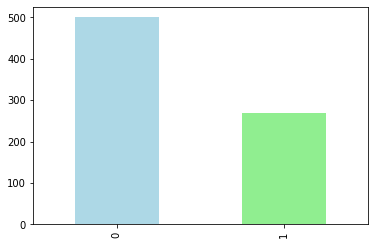

In [ ]:
train.Outcome.value_counts().plot(kind = 'bar', color = ['lightblue', 'lightgreen']); #noting imbalance in data target

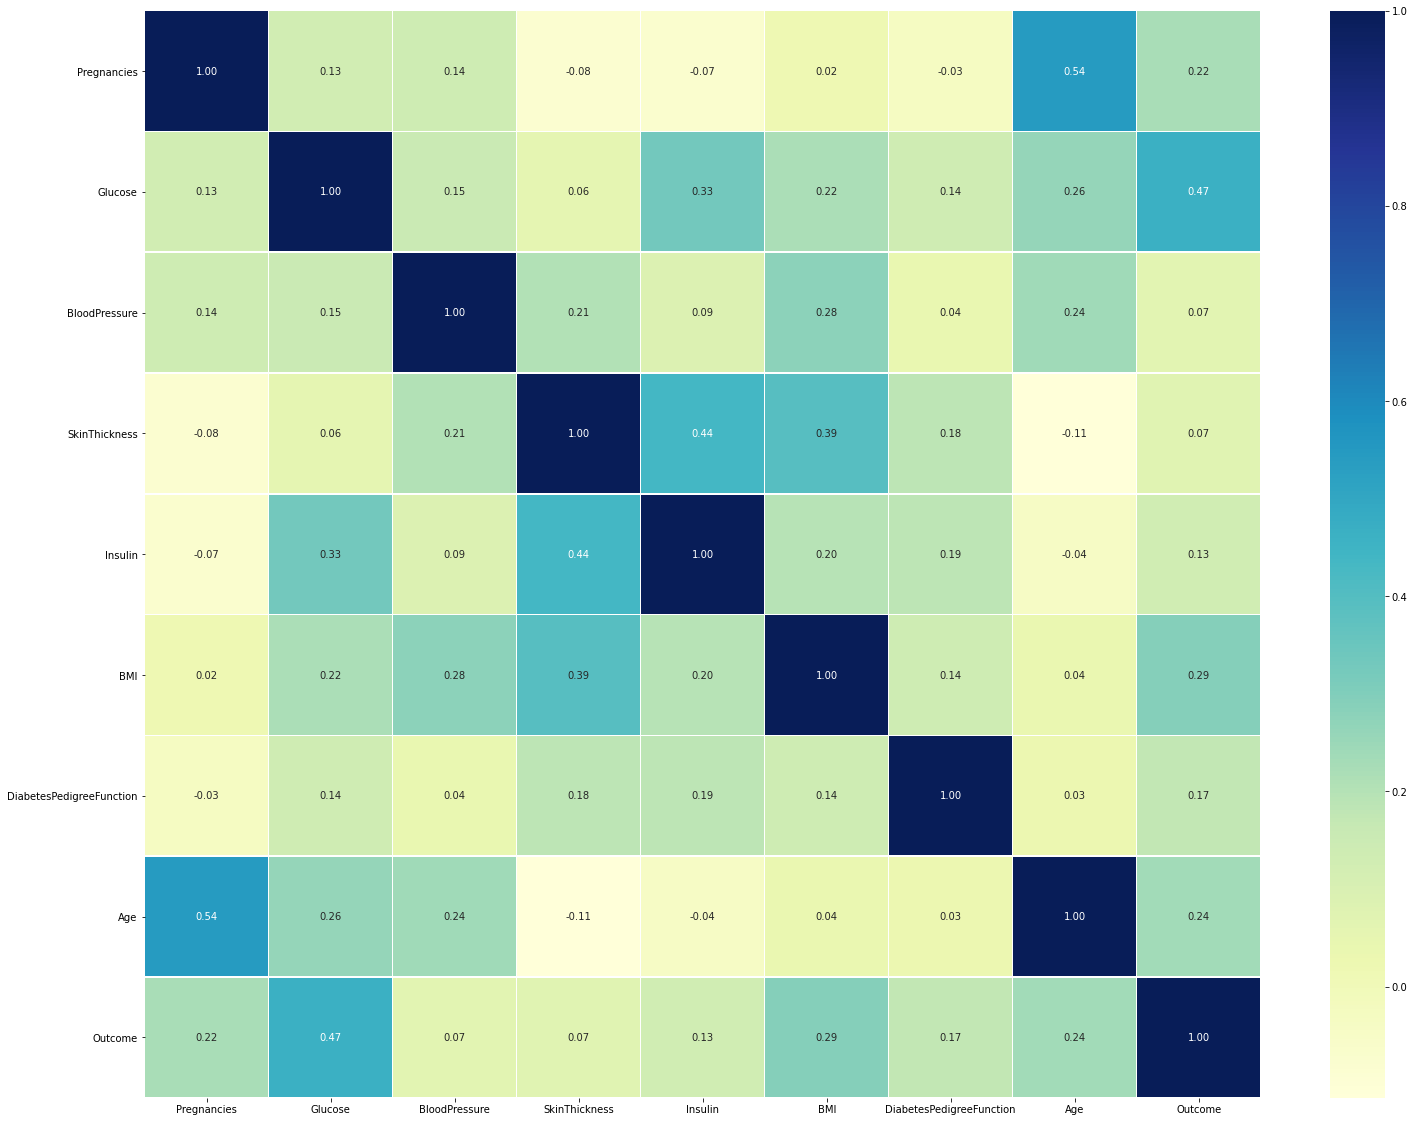

In [ ]:
import matplotlib.pyplot as plt #correlation plot to find
import seaborn as sns
correlation_matrix = train.corr()
plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

In [ ]:
from sklearn.model_selection import train_test_split # Import train_test_split 

# Split dataset into training set and test set
x=train.drop(['Outcome'],axis=1)
y=train.iloc[ : , :8]

X_train, X_test, y_train, y_test = train_test_split(x, y,random_state=2, test_size=0.2) # 80% training and 30% test
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
602,1,124.0,74.0,36.0,155.0,27.8,0.100,30
429,1,95.0,82.0,25.0,180.0,35.0,0.233,43
623,0,94.0,70.0,27.0,115.0,43.5,0.347,21
209,7,184.0,84.0,33.0,155.0,35.5,0.355,41
589,0,73.0,72.0,29.0,155.0,21.1,0.342,25


In [ ]:
from sklearn.preprocessing import MinMaxScaler #normalising so knn donot effected by features having larger values

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)


AttributeError: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


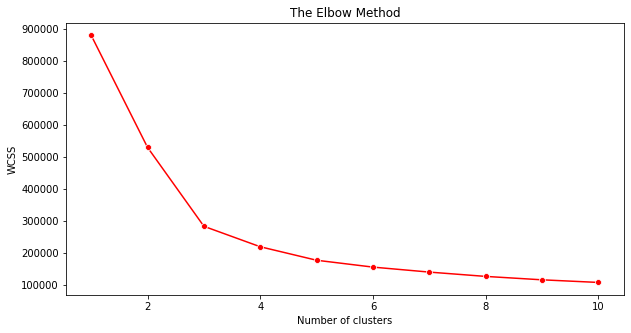

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_test)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


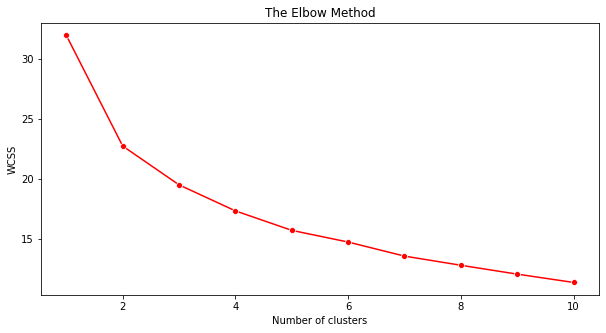

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_test_norm)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_train_norm)

In [ ]:
print(y_kmeans)
#We convert our prediction to dataframe so we can easily see this prediction in table form
df_pred = pd.DataFrame(y_kmeans)

print(df_pred.value_counts())


[1 1 1 2 1 2 1 1 0 1 0 1 1 2 2 1 1 0 1 1 0 0 2 1 1 1 1 1 0 1 1 1 0 2 1 1 1
 0 0 2 2 0 1 1 1 1 2 2 1 0 2 2 0 1 0 2 0 1 0 1 1 1 1 0 2 0 2 1 1 1 1 2 1 0
 2 0 1 1 1 0 0 0 1 1 1 0 1 1 2 1 1 0 0 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 2 1 1
 1 0 0 0 2 0 1 1 0 1 1 0 0 1 2 0 0 0 1 1 1 1 2 1 0 2 1 0 0 2 0 2 1 1 2 0 0
 2 1 1 0 1 0 1 0 1 0 0 2 1 1 1 1 2 0 0 0 0 1 2 2 0 1 0 1 1 0 1 2 1 1 2 1 1
 1 1 2 1 0 0 0 1 1 2 0 1 1 1 1 0 1 1 1 1 2 0 1 1 0 0 2 0 0 2 1 1 2 2 0 0 1
 0 0 1 1 1 2 0 1 1 1 0 2 0 1 1 2 0 2 1 1 1 2 2 1 1 1 1 1 1 1 0 1 1 0 2 0 0
 2 1 2 1 1 2 0 1 0 0 2 2 2 0 1 0 1 0 1 1 1 1 1 0 2 2 1 2 1 0 2 2 1 1 1 1 1
 1 1 1 1 1 2 1 1 1 1 0 0 0 0 1 1 1 1 1 0 2 1 1 1 1 1 1 0 0 0 1 2 0 0 1 2 1
 1 0 1 2 2 1 2 0 1 1 1 1 2 2 0 1 0 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 0 1 1 0 0
 2 2 2 2 2 0 0 0 1 1 2 1 0 1 1 2 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 2
 1 1 0 1 1 1 2 1 1 0 0 0 2 1 2 1 1 0 0 1 2 0 0 0 0 2 0 1 0 0 1 1 1 0 0 2 0
 0 2 2 2 1 0 2 0 1 0 2 0 0 1 2 1 1 1 1 1 0 1 1 0 1 1 1 1 2 1 0 1 0 2 0 1 1
 1 2 1 0 0 1 2 2 2 1 2 1 